# SNR distributions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import rcParams

# general plotting options 
rcParams.update({'figure.autolayout': True})
my_cmap = plt.cm.jet
my_cmap.set_under('white',1)
my_cmap.set_over('white', 300)
my_cmap.set_bad('white')

### Data
Data used here assumes a gaussian distribution with <b> $\sigma$=1 arcsec </b> for focal x, focal y, boresight altitude and boresight azimuth. Using these distributions, we will try to find the sweet spot if there was indeed an offset during survey

As for the detector configuration, no blur+no offsets+no random offsets were added.

In [2]:
# load the data
data = np.load("../../results.npz")
def load_source_data(source_idx):
    x_offset_data  = data["sources"][source_idx]['x_offsets']
    y_offset_data  = data["sources"][source_idx]['y_offsets']
    xy_offset_data = data["sources"][source_idx]['y_offsets']
    az_offset_data   = data["sources"][source_idx]['az_offsets']
    alt_offset_data  = data["sources"][source_idx]['alt_offsets']
    bore_offset_data= data["sources"][source_idx]['bore_offsets']
    return x_offset_data, y_offset_data, xy_offset_data, az_offset_data, alt_offset_data, bore_offset_data

In [3]:
def plot2Dhisto(band):
    results_name = 'results_'+band
    plt.figure(1)
    # x offsets
    # these values are calculated using the platescale
    plt.subplot(221)
    plt.hist2d(x_offset_data['x_offsets'], x_offset_data[results_name], bins=100, vmin=1, cmap=my_cmap)
    plt.xlim(-100, 100)
    plt.colorbar()
    plt.xlabel("x offsets [um]")
    plt.ylabel("SNR ({0} band)".format(band))
    # y offsets
    # these values are calculated using the platescale
    plt.subplot(222)
    plt.hist2d(y_offset_data['y_offsets'], y_offset_data[results_name], bins=100, vmin=1, cmap=my_cmap)
    plt.xlim(-100, 100)
    plt.colorbar()
    plt.xlabel("y offsets [um]")
    plt.ylabel("SNR ({0} band)".format(band))
    # boresight altitude offsets
    plt.subplot(223)
    plt.hist2d(alt_offset_data['alt_offsets'], alt_offset_data[results_name], bins=100, vmin=1, cmap=my_cmap)
    plt.xlim(-1.2, 1.2)
    plt.colorbar()
    plt.xlabel("Altitude offsets [arcsec]")
    plt.ylabel("SNR ({0} band)".format(band))
    # boresight azimuth offsets
    plt.subplot(224)
    plt.hist2d(az_offset_data['az_offsets'], az_offset_data[results_name], bins=100, vmin=1, cmap=my_cmap)
    plt.xlim(-1.2, 1.2)
    plt.colorbar()
    plt.xlabel("Azimuth offsets [arcsec]")
    plt.ylabel("SNR ({0} band)".format(band))
    # show the figure
    plt.savefig('snr_2dhistos_{0}-band.pdf'.format(band))
    plt.show()

These are simple plots showing the distributions of the parameters

In [4]:
# source id: idx-1 gives the source in the input yaml file
# for this notebook, "example.yaml" is used
# idx [0:2]: LRG
#     [3:6]: ELG
#     [7]  : QSO
# Difference between 3 LRGs (and also ELGS) is the half light radius. 
# To see the effect, it was changed from 0.5 up to 1.3 in 0.4 increments
idx = 3
x_offset_data, y_offset_data, xy_offset_data, az_offset_data, alt_offset_data, bore_offset_data = load_source_data(idx)

/home/tyapici/anaconda/anaconda3/envs/desi/lib/python3.5/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


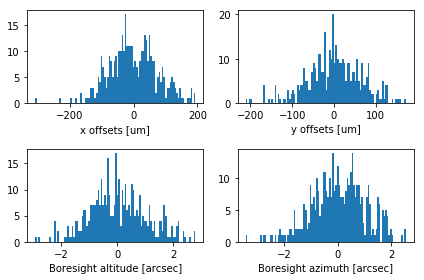

In [5]:
# Generate plots visualizing the distributions of each random offset
# we introduced to the problem
plt.figure(1)
# x offsets
# these values are calculated using the platescale
plt.subplot(221)
plt.hist(x_offset_data['x_offsets'], bins=100)
plt.xlabel("x offsets [um]")
# y offsets
# these values are calculated using the platescale
plt.subplot(222)
plt.hist(y_offset_data['y_offsets'], bins=100)
plt.xlabel("y offsets [um]")
# boresight altitude offsets
plt.subplot(223)
plt.hist(alt_offset_data['alt_offsets'], bins=100)
plt.xlabel("Boresight altitude [arcsec]")
# boresight azimuth offsets
plt.subplot(224)
plt.hist(az_offset_data['az_offsets'], bins=100)
plt.xlabel("Boresight azimuth [arcsec]")
# show the figure
plt.savefig('snr_1dhistos.pdf')
plt.show()

/home/tyapici/anaconda/anaconda3/envs/desi/lib/python3.5/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


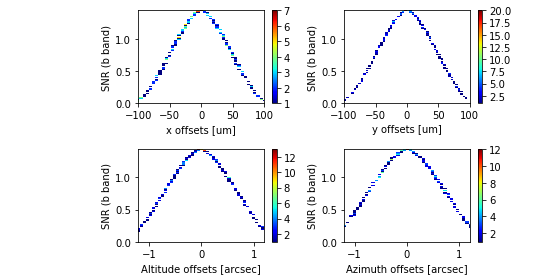

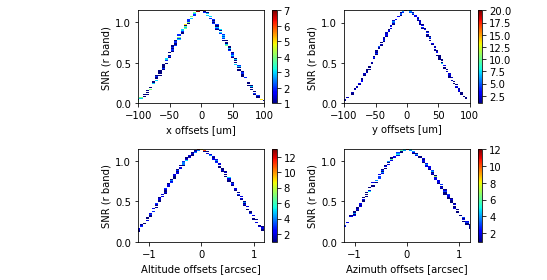

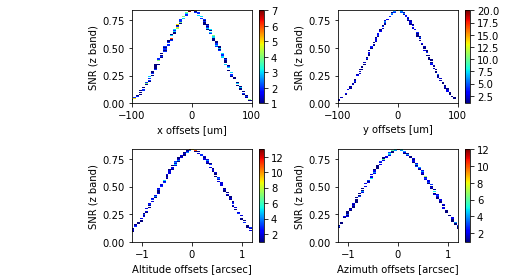

In [6]:
# Generate plts showing the 2D histogram of the offsets and SNR
# for different bands
plot2Dhisto('b')
plot2Dhisto('r')
plot2Dhisto('z')

### Conclusion
The distributions show that the SNR follows a Gaussian distribution for different offsets. This information will be used in the proceeding notebooks